In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize
from scipy.linalg import lstsq

## 24. Разделимые наименьшие квадраты

[Каханер–Моулер–Нэш] 

Пусть необходимо аппроксимировать $m$ точек данных $(t_i,\, y_i)$ $(i=1,2,\dots,m)$ с помощью функции
$$
   b(t) = c_1 + c_2 t + c_3 t^2 + c_4 e^{\lambda t}.
$$
Параметры $c_1,\dots,c_4$ входят линейно, а $\lambda$ нелинейно.
Рассмотрим матрицу
$$
A(\lambda) =
\left(
\begin{array}{cccc}
    1 & t_1 & t_1^2 & e^{\lambda t_1}  \\
    1 & t_2 & t_2^2 & e^{\lambda t_2}  \\
    \vdots & \vdots & \vdots & \vdots  \\
    1 & t_m & t_m^2 & e^{\lambda t_m}  \\
\end{array}
\right)
$$
и векторы
$$
y = 
\left(
\begin{array}{c}
   y_1 \\ y_2 \\ \vdots \\ y_m
\end{array}
\right),
\qquad
c = 
\left(
\begin{array}{c}
   c_1 \\ c_2 \\ c_3\\ c_4
\end{array}
\right).
$$
Тогда задачу наименьших квадратов можно поставить следующим образом:
$$
\min_{\lambda}  \min_{c}  \|A(\lambda) c - y\|_2.
$$
Для любого заданного $\lambda$ внутренний минимум можно найти линейным методом наименьших квадратов.
Для нахождения внешнего минимума можно воспользоваться методом одномерной минимизации.

В таблице ниже приведены две группы данных, к которым необходимо применить описанный подход.
Единственным ли образом определяются неизвестные параметры?
Изобразите данные на графике и постройте графики построенных моделей.

```
       t        y         y
             Группа 1  Группа 2
 -----------------------------------
     0.00     20.00     20.00
     0.25     51.58     24.13
     0.50     68.73     26.50
     0.75     75.46     27.13
     1.00     74.36     26.00
     1.25     67.09     23.13
     1.50     54.73     18.50
     1.75     37.98     12.13
     2.00     17.28      4.00
```

Создаем массивы со значениями

In [8]:
t=np.array([0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2])
y1=np.array([20,51.58,68.73,75.46,74.36,67.09,54.73,37.98,17.28])
y2=np.array([20,24.13,26.5,27.13,26,23.13,18.5,12.13,4])

С помощью $plt.plot$ визуализируем наши точки

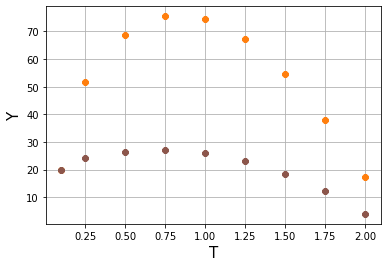

In [9]:
plt.plot(t, y1, '8', color='tab:orange')
plt.plot(t, y2, '8', color='tab:brown')
plt.xlabel('T', size=15)
plt.ylabel('Y', size=15)
plt.grid()
pass

Интерепретируем функцию $$
   b(t) = c_1 + c_2 t + c_3 t^2 + c_4 e^{\lambda t}.
$$



In [10]:
def func(_lambda, c, t):
    return c[0] + c[1] * t + c[2] * (t ** 2) + c[3] * (np.e ** (_lambda * t))

Создаем функцию-решатель для МНК.

https://pyprog.pro/linear_algebra_functions/linalg_lstsq.html

In [11]:
def LSQM(_lambda,group_y):
    A = np.empty((9,4), dtype = float) #Создаем пустую матрицу размером 9 строк на 4 столбца
    A = np.array([[1,t[0],t[0]**2,np.e**(_lambda*t[0])],
                  [1,t[1],t[1]**2,np.e**(_lambda*t[1])],
                   [1,t[2],t[2]**2,np.e**(_lambda*t[2])],
                   [1,t[3],t[3]**2,np.e**(_lambda*t[3])],
                   [1,t[4],t[4]**2,np.e**(_lambda*t[4])],
                   [1,t[5],t[5]**2,np.e**(_lambda*t[5])],
                   [1,t[6],t[6]**2,np.e**(_lambda*t[6])],
                   [1,t[7],t[7]**2,np.e**(_lambda*t[7])],
                   [1,t[8],t[8]**2,np.e**(_lambda*t[8])]]) #Заполняем пустую матрицу в соответствии с данным условием
    
    return np.linalg.lstsq(A, group_y,rcond=0)[0] #Используем метод наименьших квадратов из библиотеки NumPy, параметр rcond добавлен для игнорирования предупреждений

Создаем  функцию - решатель


In [12]:
def solver_y1(_lambda):   #Решатель для первой группы данных 
    c = LSQM(_lambda, y1)

    approxy = func(_lambda, c, t) #Находим значения нашей функции для x

    return np.sum((approxy - y1) ** 2) # Получаем и возвращаем значение среднеквадратичной ошибки

def solver_y2(_lambda):   #Решатель для второй группы данных
    c = LSQM(_lambda, y2)

    approxy = func(_lambda, c, t)

    return np.sum((approxy - y2) ** 2)

В условии указано, что для нахождения минимума следует воспользоваться методом одномерной минимизации.
Поэтому, построим график каждой функции (solver_y1, solver_y2), и найдем интервал, на котором находится минимум минимизируемой функции

Для первой:


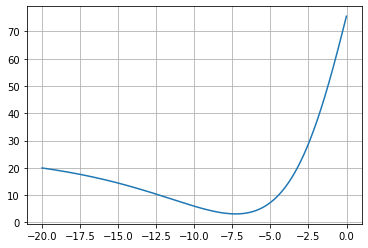

In [13]:
x_graph = np.arange(-20, 0, .01, dtype = float)
y_graph = []
for x in x_graph:
    y_graph.append(solver_y1(x))
    
plt.grid()
plt.plot(x_graph, y_graph)


Как мы можем видеть, минимум присутствует на определённом интервале, приблизительно (-12 ; -2.5)

Для второй:

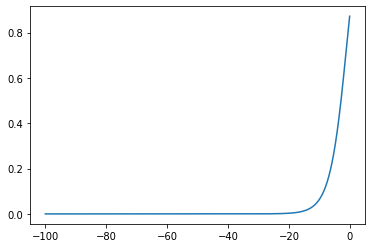

In [58]:
x_graph = np.arange(-100, 0, .1, dtype = float)
y_graph = []
for x in x_graph:
    y_graph.append(solver_y2(x))
    
plt.plot(x_graph, y_graph)

Как мы можем видеть, во втором случае - функция непрерывно возрастает, поэтому использовать метод одномерной минимизации будет бессмысленно

Тогда возьмем  приблизительное значение, _lambda = -10

Построим наши графики аппроксимации

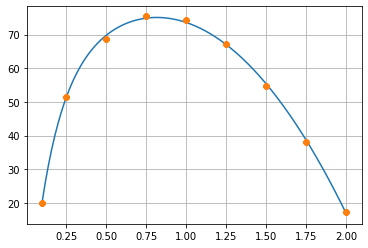

In [64]:
import scipy.optimize
_lambda = optimize.brent(solver_y1,brack=(-12,2.5)) #Использую Метод Брента - одномерную минимизацию

t_val1 = np.arange(0.1, 2.01, 0.01)
C = LSQM(_lambda, y1)
y_val1 = func(_lambda, C, t_val1)

plt.grid()
plt.plot(t_val1, y_val1)
plt.plot(t, y1, '8')

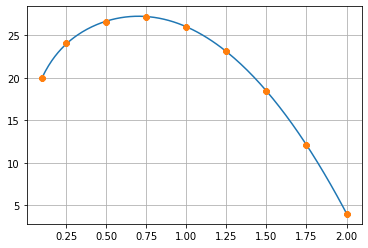

In [52]:
_lambda = -10

t_val2 = np.arange(0.1, 2.01, 0.01, dtype = float)
C = LSQM(_lambda, y2)
y_val2 = func(_lambda, C, t_val2)

plt.grid()
plt.plot(t_val2, y_val2)
plt.plot(t, y2, '8')

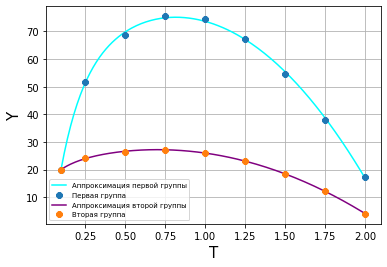

In [65]:
#Отобразим на графике наши точки и аппроксимацию
plt.xlabel('T', size=15)
plt.ylabel('Y', size=15)
plt.plot(t_val1, y_val1,color = 'cyan', label='Аппроксимация первой группы')
plt.plot(t, y1, '8',label='Первая группа')
plt.grid()
plt.plot(t_val2, y_val2,color = 'purple',label='Аппроксимация второй группы')
plt.plot(t, y2, '8',label='Вторая группа')
plt.legend(loc = 'lower left', fontsize = 'x-small')

Вывод

В первом случае минимум может быть определён единственным образом, т.к из графика внешней функции видно, что минимум существует на определённом интервале. Поэтому мы можем найти его методом одномерной минимизации.

Во втором случае минимум с помощью одномерной минимизации не может быть определён, т.к график внешней функции непрерывно возрастает. Поэтому мы можем подобрать лишь приблизительное значение. В данном конкретном случае таким значением оказалось число -10.